<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/04_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install tensorflow

In [44]:
import zipfile

In [45]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-09-16 16:19:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M  45.3MB/s    in 3.8s    

2025-09-16 16:19:14 (42.2 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [46]:
zip_ref=zipfile.ZipFile('10_food_classes_10_percent.zip')

In [47]:
zip_ref.extractall()
zip_ref.close()

In [48]:
import os

In [49]:
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/train
There are 0 directories and 75 images in 10_food_classes_10_percent/train/pizza
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 images in 10_food_classes_10_percent/train/chicken_curry
There are 0 directories and 75 images in 10_food_classes_10_percent/train/steak
There are 0 directories and 75 images in 10_food_classes_10_percent/train/hamburger
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ice_cream
There are 0 directories and 75 images in 10_food_classes_10_percent/train/sushi
There are 0 directories and 75 images in 10_food_classes_10_percent/train/grilled_salmon
There are 0 directories and 75 images in 10_food_classes_10_percent/train/ramen
There are 0 directories and 75 images in 10_food_classes_10_percent/train/fried_rice
There are 10 director

In [50]:
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
train_datagen=ImageDataGenerator(rescale=(1/255))
test_datagen=ImageDataGenerator(rescale=(1/255))

In [53]:
print('Training data : ')
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(256,256),class_mode='categorical')
print('Testing data : ')
test_data=test_datagen.flow_from_directory(test_dir,target_size=(256,256),batch_size=32,class_mode='categorical')


Training data : 
Found 750 images belonging to 10 classes.
Testing data : 
Found 2500 images belonging to 10 classes.


In [54]:
import datetime
import tensorflow as tf
from tf_keras.callbacks import TensorBoard

In [55]:
def create_tensorboard_callback(dirname,experiment_name):
    log_dir=dirname + "/" + experiment_name + datetime.datetime.now().strftime("%y%m%d-%H%M%S")
    tensorboard_callback=TensorBoard(log_dir=log_dir)
    print(f'saving log dir to {log_dir}')
    return tensorboard_callback

Resnet v2-50  and Efficeient net

In [56]:
!pip install tensorflow_hub
import tensorflow as tf
import tensorflow_hub as hub
from tf_keras import layers, Sequential

In [57]:
# we will compare two models resnetv50 and efficentnet
resnet_url="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [58]:
# Lets functionize model creation

def create_model(model_url, num_classes=10):
    feature_extractor_layer = hub.KerasLayer(
        model_url,
        trainable=False,
        input_shape=(256, 256, 3)  # required for hub feature-vector models
    )

    model = Sequential([
        feature_extractor_layer,
        layers.Dense(num_classes, activation="softmax")
    ])

    return model

In [59]:
resnet_model=create_model(model_url=resnet_url,num_classes=train_data.num_classes)

In [60]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [61]:
resnet_model.compile(loss='categorical_crossentropy',
                     metrics=['accuracy'],
                     optimizer='adam',)

Lets now fit our resnet model to the data

In [62]:
resnet_hitory=resnet_model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),callbacks=[create_tensorboard_callback(dirname='tensorflow_hub',experiment_name='resnetv50')])

saving log dir to tensorflow_hub/resnetv50250916-161926
Epoch 1/5
24/24 [==============================] - 29s 753ms/step - loss: 2.0127 - accuracy: 0.3413 - val_loss: 1.2274 - val_accuracy: 0.6304
Epoch 2/5
24/24 [==============================] - 12s 521ms/step - loss: 0.9646 - accuracy: 0.7267 - val_loss: 0.8460 - val_accuracy: 0.7472
Epoch 3/5
24/24 [==============================] - 13s 550ms/step - loss: 0.6599 - accuracy: 0.8240 - val_loss: 0.7095 - val_accuracy: 0.7888
Epoch 4/5
24/24 [==============================] - 13s 549ms/step - loss: 0.5057 - accuracy: 0.8747 - val_loss: 0.6813 - val_accuracy: 0.7924
Epoch 5/5
24/24 [==============================] - 12s 509ms/step - loss: 0.4087 - accuracy: 0.8947 - val_loss: 0.6213 - val_accuracy: 0.8040


Plot Loss Curves

In [63]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
   loss=history.history['loss']
   val_loss=history.history['val_loss']
   accuracy=history.history['accuracy']
   val_accuracy=history.history['val_accuracy']
   epochs=range(len(history.history['loss']))
   plt.plot(epochs,loss,label='Training loss')
   plt.plot(epochs,val_loss,label='validation loss')
   plt.title('Loss')
   plt.xlabel('epohcs')
   plt.legend()

   plt.figure()
   plt.plot(epochs,accuracy,label='Training accuracy')
   plt.plot(epochs,val_accuracy,label='validation accuracy')
   plt.title('accuracy')
   plt.xlabel('epohcs')
   plt.legend()

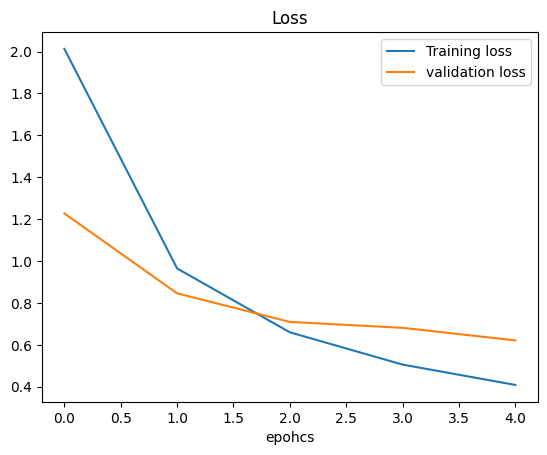

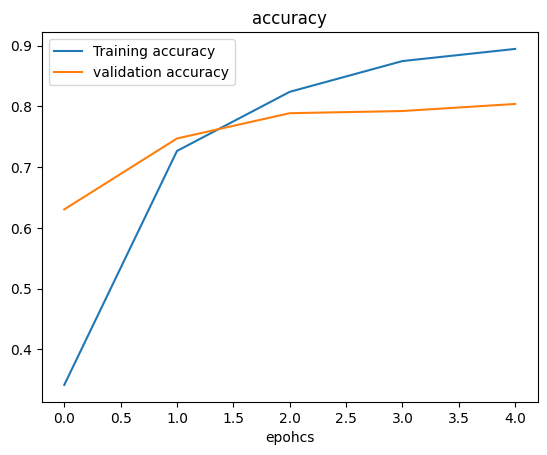

In [64]:
plot_loss_curves(resnet_hitory)